# SEP Distribution Tool

This tool downloads SEP intensity-time series data from various different spacecraft and visualizes the SEP distribution using Gaussian curves in one final results plot.

This tool uses a preset proton energy range to keep the various observations comparable.

There is an option to also show a spacecraft-constellation plot (Solar-MACH) and a table summarizing the spacecraft coordinates for the selected time interval.

## Table of Contents
1. [Load the event](#Load-the-event)
2. [Background Subtraction](#Background-Subtraction)
3. [Instrument Intercalibration](#Instrument-Intercalibration)
4. [Radial Scaling](#Radial-Scaling)
5. [Peak Fits](#Peak-Fits)
6. [Gaussian Fits](#Gaussian-Fits)
7. [Final Results](#Final-Results)
- [Appendix](#Appendix)
- [Glossary](#Glossary)

In [1]:
# Import modules
#import JTL_SEP_functions as jtlc
from JTL_SEP_functions import SEPEvent

from seppy.util import jupyterhub_data_path
import datetime as dt
import numpy as np
import os
import pandas as pd

from solarmach import SolarMACH

## Saving figures and date

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).

In [2]:
# Set your local path where you want to save the data files. 
# If run on the project's JupyterHub server, set it to a common data folder. 
data_path = f"{os.getcwd()}{os.sep}data/"
try: 
    os.makedirs(data_path)
except FileExistsError:
    pass
#data_path = jupyterhub_data_path(data_path)

## Load the event
[Return to top](#Table-of-Contents)

Collect the event start and end dates (specifying the start at / near the observed flare onset time), and the eruption location (in Stonyhurst).

In [3]:
# Options
event_options = {'28May2021': {'date': "2021/05/28 22:19:00",
                               'source': [67, 18]},
                 '29Mar2025': {'date': "2025/03/29 00:30:00",
                               'source': [np.nan, np.nan]},
                 '04Jan2025': {'date': "2025/01/04 18:27:00",
                               'source': [60, -15]},
                 '17Dec2024': {'date': "2024/12/17 12:53:00",
                               'source': [33, -16]},
                 '08Dec2024': {'date': "2024/12/08 08:50:00",
                               'source': [52, -6]},
                 '03Oct2024': {'date': "2024/10/03 12:08:00",
                               'source': [8, -15]},
                 '01Sep2024': {'date': "2024/09/01 14:44:00",
                               'source': [66, -12]},
                 '22Jul2024': {'date': "2024/07/22 22:30:00",
                               'source': [np.nan, np.nan]},
                 '23Mar2024': {'date': "2024/03/23 00:58:00",
                               'source': [-15, -14]},
                 '29Jan2024': {'date': "2024/01/29 03:54:00",
                               'source': [86, 28]},
                 '28Sep2021': {'date': "2021/09/28 05:54:00",
                               'source': [36, -26]}}

startdate = dt.datetime.strptime(event_options['28May2021']['date'], "%Y/%m/%d %H:%M:%S")
enddate = startdate + pd.Timedelta(days=1)

source_location = event_options['28May2021']['source'] #longitude, latitude


In [4]:
startdate

datetime.datetime(2021, 5, 28, 22, 19)

### Show the fleet distribution
For more information on the Solar-MACH tool, see: [the Online Tool](https://solar-mach.github.io/) and the links within.

NB: If you wish to use BepiColombo data then it will need to downloaded separately and saved to the same folder.

No solar wind speeds defined, trying to obtain measurements...


/home/jaxl/anaconda3/envs/SEP_env/lib/python3.12/site-packages/speasy/core/data_containers.py:17: UserWarning: no explicit representation of timezones available for np.datetime64
  return np.searchsorted(time, np.datetime64(key, 'ns'), side='left')


Body 'BepiColombo' not supported, assuming default Vsw value of 400.0 km/s.


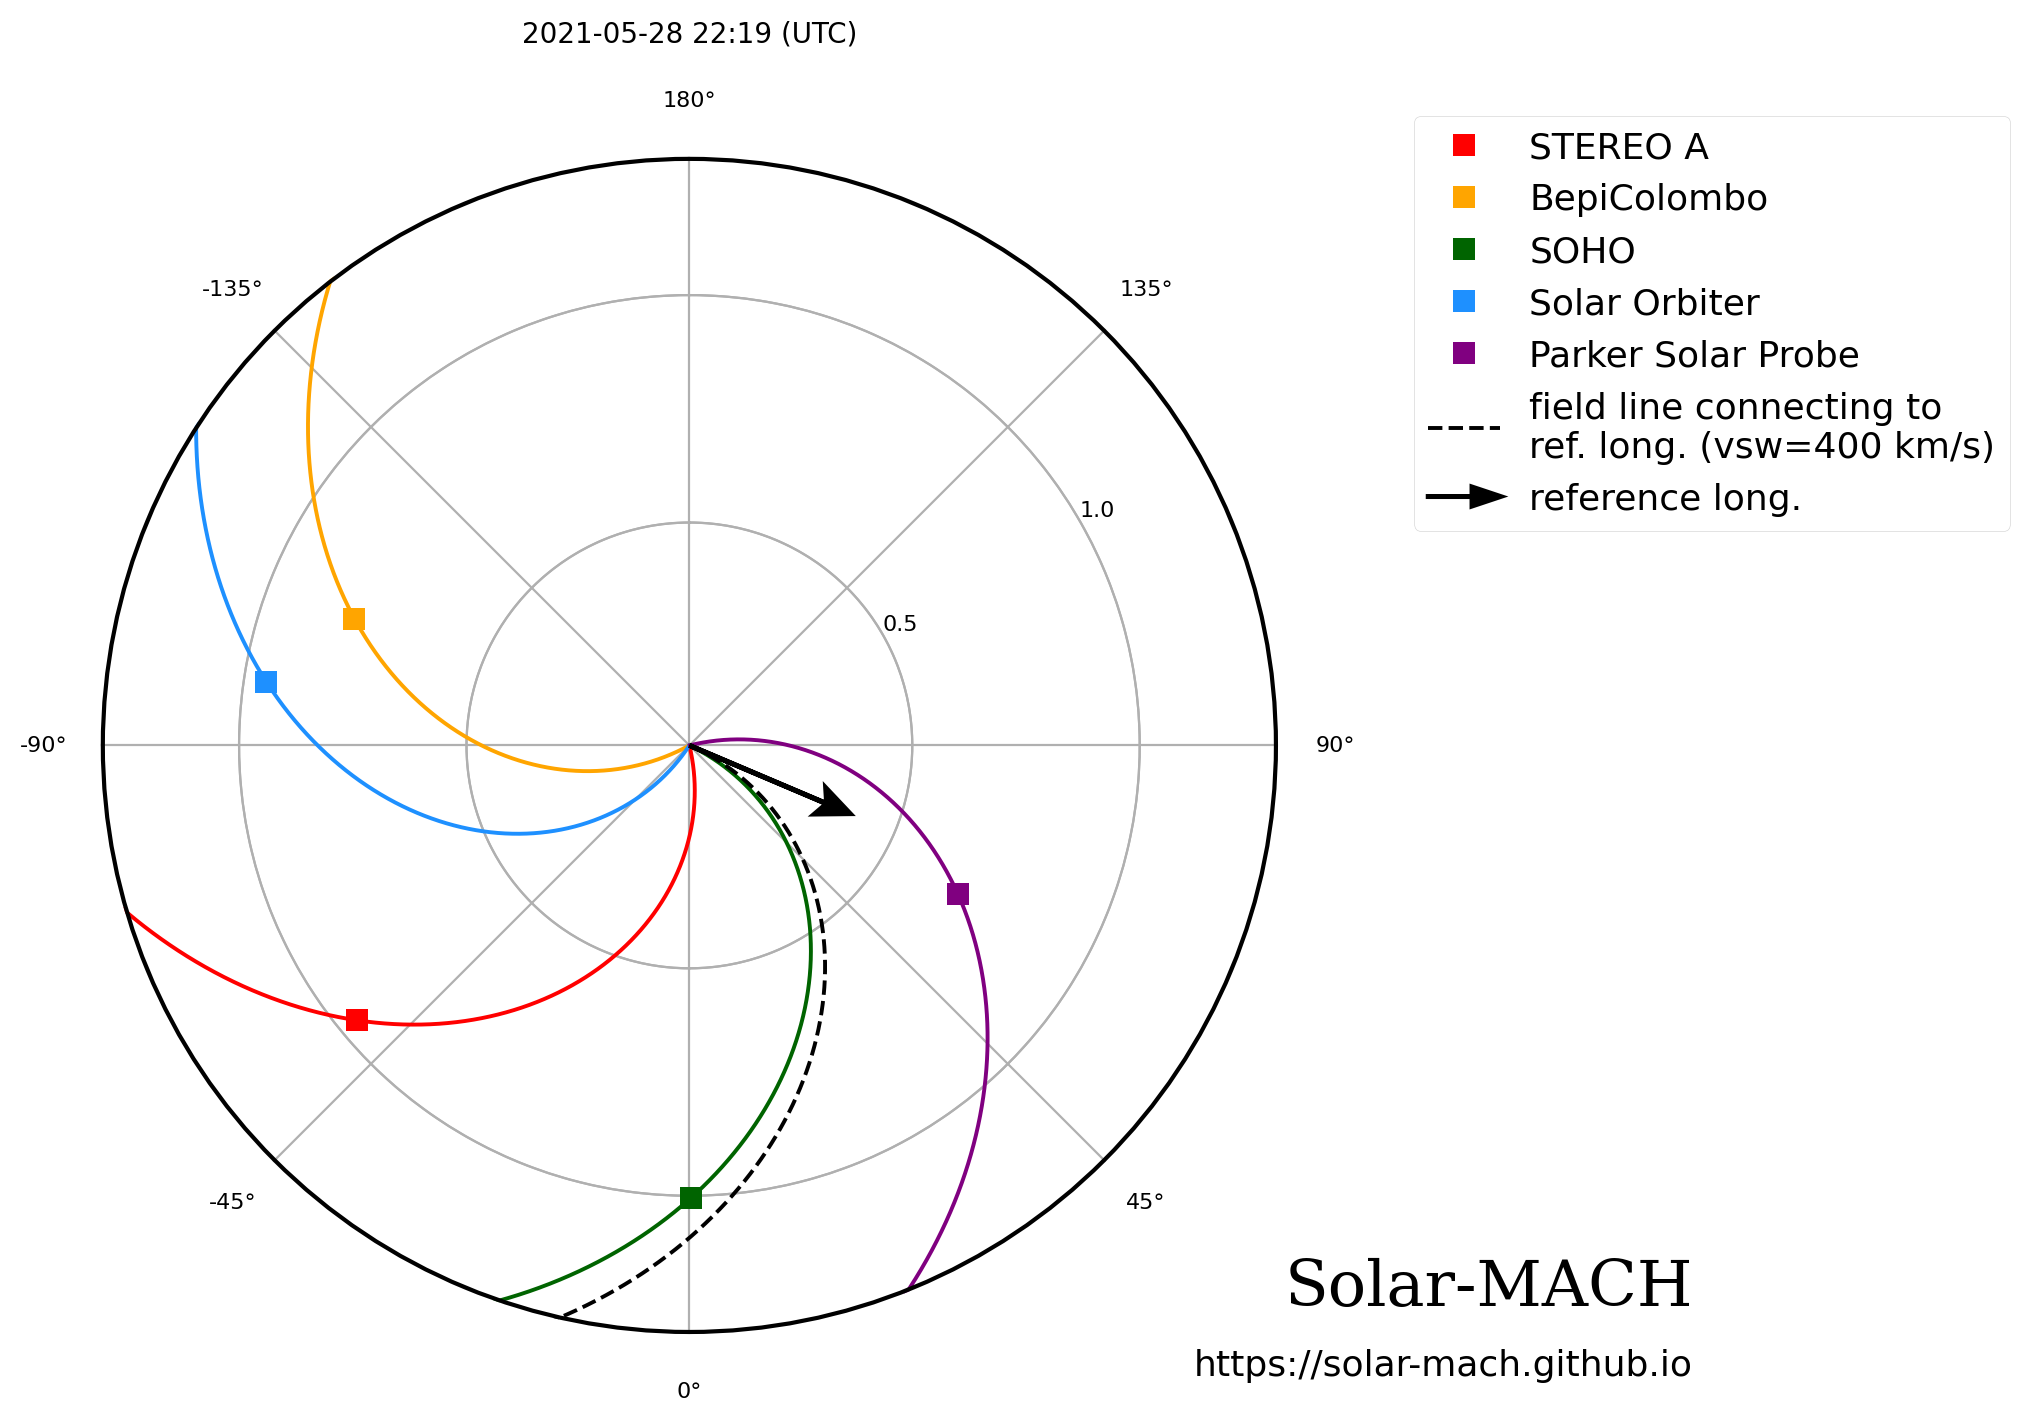

In [5]:
sm = SolarMACH(startdate, ['STEREO-A', 'BepiColombo', 'SOHO', 'Solar Orbiter', 'PSP'], vsw_list=[], 
              reference_long=source_location[0], reference_lat=source_location[1], coord_sys='Stonyhurst')

sm.plot(outfile=f'{data_path}SolarMACH_{startdate.strftime("%d%m%Y_%Hh%M")}.png')

In [6]:
display(sm.coord_table)

Spacecraft/Body  Stonyhurst longitude (°)  Stonyhurst latitude (°)  \
0        STEREO-A                -50.395401                -6.234611   
1     BepiColombo               -110.733366                -3.410311   
2            SOHO                  0.255711                -1.010817   
3   Solar Orbiter                -98.578091                -0.943589   
4             PSP                 61.059695                 3.108280   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.963644                                    -50.395399   
1                    0.798805                                   -110.733364   
2                    1.004046                                      0.255714   
3                    0.950952                                    -98.578089   
4                    0.685340                                     61.059698   

   Latitudinal separation to Earth's latitude         Vsw  \
0                                   -5.197760  371.396552   
1                                   -2.373459  400.000000   
2                                    0.026034  388.090909   
3                                    0.093263  361.985863   
4                                    4.145132  394.720640   

   Magnetic footpoint longitude (Stonyhurst)  \
0                                  13.897956   
1                                 -61.011138   
2                                  64.893892   
3                                 -32.958183   
4                                 104.265955   

   Longitudinal separation between body and reference_long  \
0                                        -117.395401         
1                                        -177.733366         
2                                         -66.744289         
3                                        -165.578091         
4                                          -5.940305         

   Longitudinal separation between body's magnetic footpoint and reference_long  \
0                                         -53.102044                              
1                                        -128.011138                              
2                                          -2.106108                              
3                                         -99.958183                              
4                                          37.265955                              

   Latitudinal separation between body and reference_lat  
0                                         -24.234611      
1                                         -21.410311      
2                                         -19.010817      
3                                         -18.943589      
4                                         -14.891720

### Spacecraft options

List the spacecraft you want to use in this notebook, the proton energy channels for each instrument, and the time interval you wish to use (resampling).

The default channels provided are for ~14 MeV protons.

In [7]:
# ~14 MeV Proton channels
spacecraft_channels = {'PSP': [3,4],
                       'SOHO': [0],
                       'STEREO-A': [0],
                       'Solar Orbiter': [10,12]}

resampling = '15min'

<div class="alert alert-block alert-warning">
<b>Notes for Jan:</b> Could you please turn off the warnings from the data loaders?
</div>

In [8]:
may282021 = SEPEvent(channels = spacecraft_channels, 
                     dates = [startdate, enddate], 
                     resampling = resampling,
                     data_path = data_path, 
                     coord_sys = 'Stonyhurst', 
                     flare_loc = source_location)

2025-12-01 15:55:04 - sunpy - WARNING: SunpyUserWarning: The variable "HET_A_R17_SECT_HCI" has been skipped because it has more than 2 dimensions, which is unsupported.
2025-12-01 15:55:04 - sunpy - WARNING: SunpyUserWarning: The variable "HET_A_R17_SECT_RTN" has been skipped because it has more than 2 dimensions, which is unsupported.
2025-12-01 15:55:04 - sunpy - WARNING: SunpyUserWarning: The variable "HET_B_R17_SECT_HCI" has been skipped because it has more than 2 dimensions, which is unsupported.
2025-12-01 15:55:04 - sunpy - WARNING: SunpyUserWarning: The variable "HET_B_R17_SECT_RTN" has been skipped because it has more than 2 dimensions, which is unsupported.
2025-12-01 15:55:06 - sunpy - WARNING: SunpyUserWarning: The variable "HET_A_R17_SECT_HCI" has been skipped because it has more than 2 dimensions, which is unsupported.
2025-12-01 15:55:06 - sunpy - WARNING: SunpyUserWarning: The variable "HET_A_R17_SECT_RTN" has been skipped because it has more than 2 dimensions, which is

{'A': 0.46943364143829985, 'X0': 101.28460195425198, 'sigma': 37.0196399376769, 'A err': 0.24420868708263416, 'X0 err': 38.3123792975415, 'sigma err': 12.227339346148538, 'res': 0.04152522595839013}
{'sc': ['PSP', 'SOHO', 'STEREO-A', 'Solar Orbiter'], 'times': [Timestamp('2021-05-29 01:45:00'), Timestamp('2021-05-29 01:30:00'), Timestamp('2021-05-29 04:00:00'), Timestamp('2021-05-29 01:30:00')], 'y': [0.4186844414604839, 0.535209699330676, -0.9942551183081348, -2.1274843745605683], 'yerr': [-1.3388859013456615, -2.013542510463768, -1.9563943352012856, -2.8083279154707483], 'x': [105.53736582347138, 64.52480937316795, 13.889032018153928, -31.25494869595738], 'xerr': [4.867117610573341, 6.908380179645595, 7.274831875724192, 8.05224022343561]}


In [9]:
# Test
may282021.get_sc_df('Solar Orbiter')

Flux  Uncertainty  r_dist  vsw  foot_long  \
Time                                                                 
2021-05-28 00:00:00  0.000328     0.000328     NaN  NaN        NaN   
2021-05-28 00:15:00  0.000656     0.000464     NaN  NaN        NaN   
2021-05-28 00:30:00  0.000324     0.000324     NaN  NaN        NaN   
2021-05-28 00:45:00  0.000324     0.000324     NaN  NaN        NaN   
2021-05-28 01:00:00  0.000324     0.000324     NaN  NaN        NaN   
...                       ...          ...     ...  ...        ...   
2021-05-29 22:45:00  0.000649     0.000459     NaN  NaN        NaN   
2021-05-29 23:00:00  0.000000     0.000000     NaN  NaN        NaN   
2021-05-29 23:15:00  0.000973     0.000562     NaN  NaN        NaN   
2021-05-29 23:30:00  0.000656     0.000464     NaN  NaN        NaN   
2021-05-29 23:45:00  0.000980     0.000566     NaN  NaN        NaN   

                     foot_long_error  
Time                                  
2021-05-28 00:00:00              NaN  
2021-05-28 00:15:00              NaN  
2021-05-28 00:30:00              NaN  
2021-05-28 00:45:00              NaN  
2021-05-28 01:00:00              NaN  
...                              ...  
2021-05-29 22:45:00              NaN  
2021-05-29 23:00:00              NaN  
2021-05-29 23:15:00              NaN  
2021-05-29 23:30:00              NaN  
2021-05-29 23:45:00              NaN  

[192 rows x 6 columns]

In [10]:
may282021.get_peak_df()

{'sc': ['PSP', 'SOHO', 'STEREO-A', 'Solar Orbiter'],
 'times': [Timestamp('2021-05-29 01:45:00'),
  Timestamp('2021-05-29 01:30:00'),
  Timestamp('2021-05-29 04:00:00'),
  Timestamp('2021-05-29 01:30:00')],
 'y': [0.4186844414604839,
  0.535209699330676,
  -0.9942551183081348,
  -2.1274843745605683],
 'yerr': [-1.3388859013456615,
  -2.013542510463768,
  -1.9563943352012856,
  -2.8083279154707483],
 'x': [105.53736582347138,
  64.52480937316795,
  13.889032018153928,
  -31.25494869595738],
 'xerr': [4.867117610573341,
  6.908380179645595,
  7.274831875724192,
  8.05224022343561],
 'A': 0.46943364143829985,
 'X0': 101.28460195425198,
 'sigma': 37.0196399376769,
 'A err': 0.24420868708263416,
 'X0 err': 38.3123792975415,
 'sigma err': 12.227339346148538,
 'res': 0.04152522595839013}

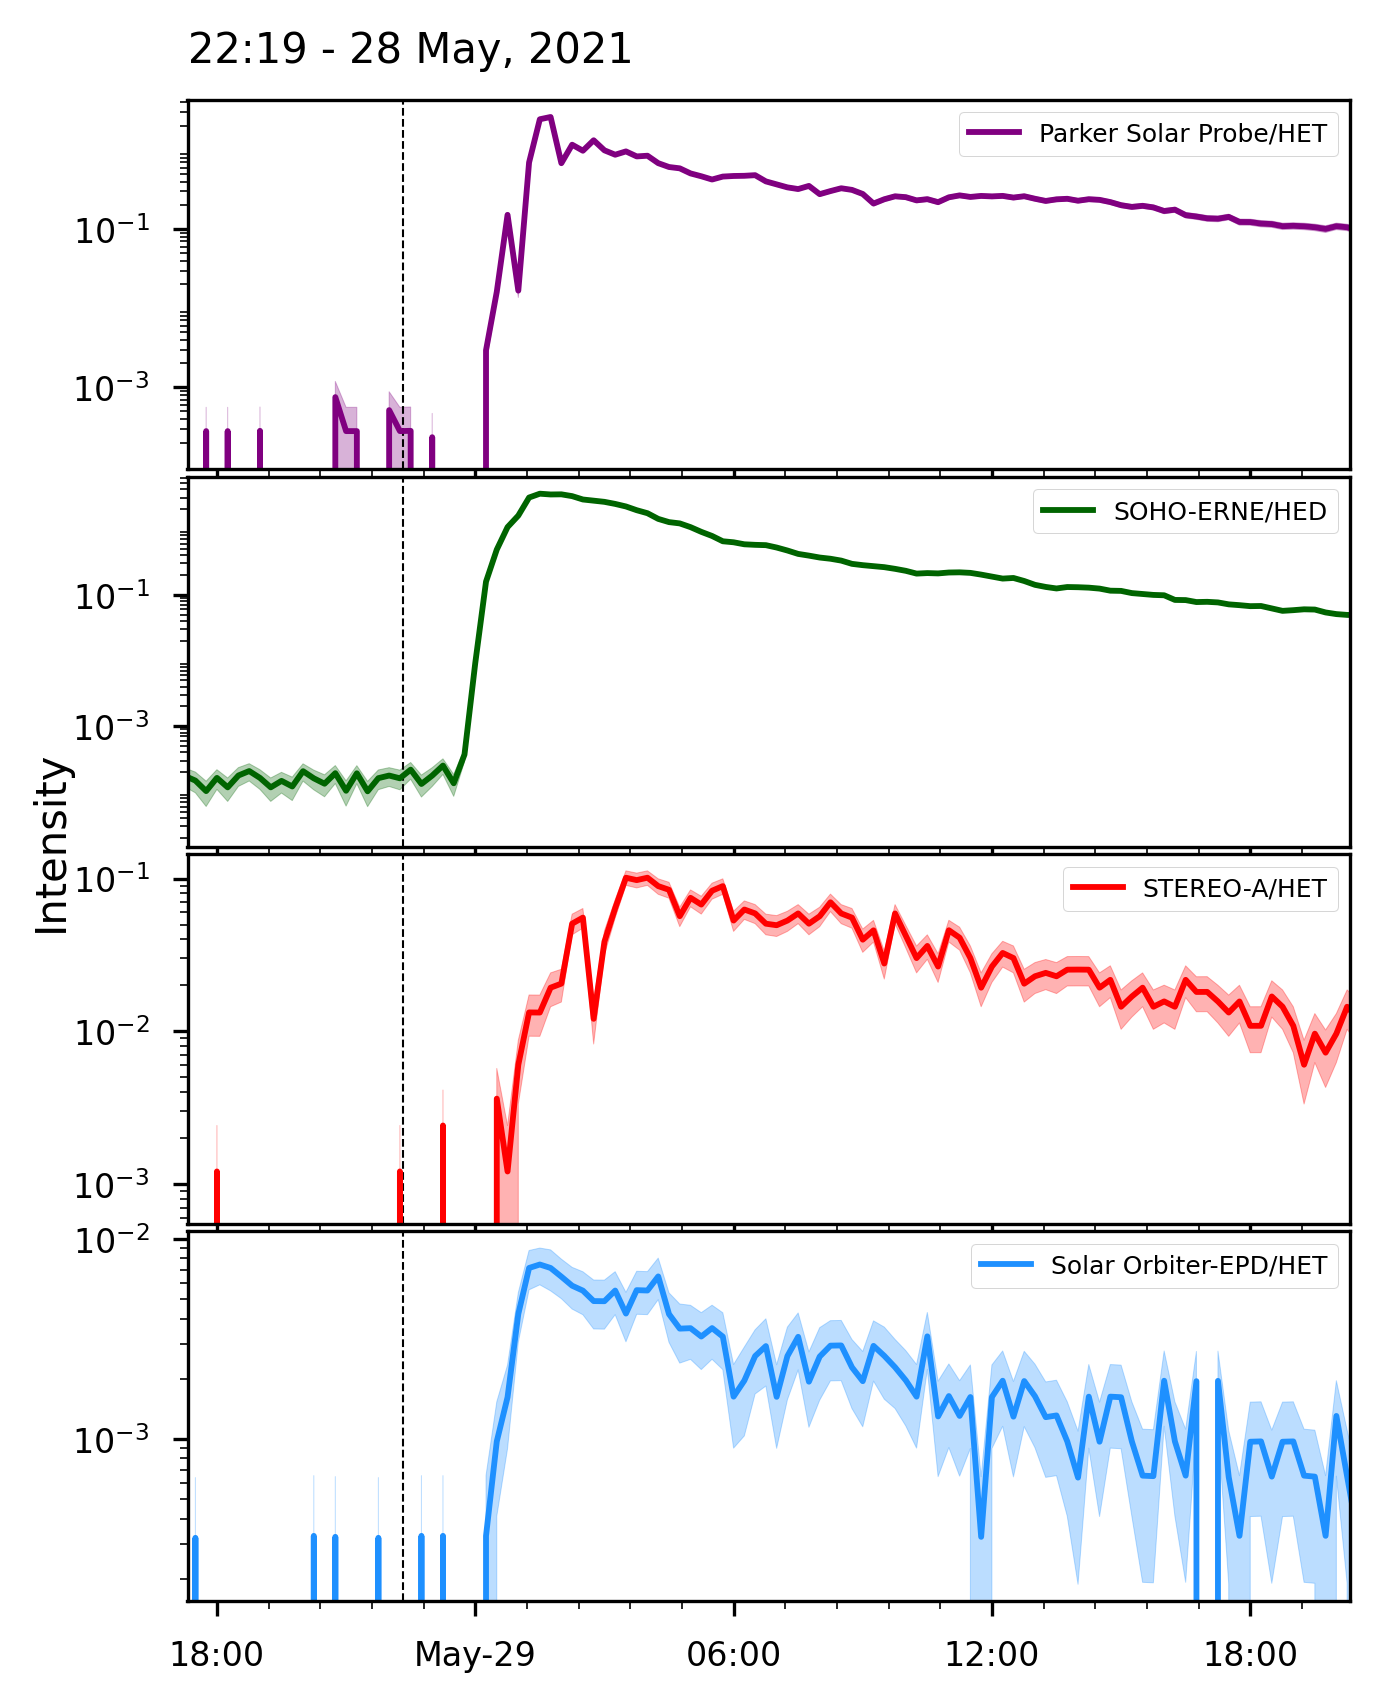

In [11]:
may282021.plot_intensities()

## Background Subtraction
[Return to top](#Table-of-Contents)

plot time series of all instruments and let the user decide on a background window for each. Then background subtract it all.

<div class="alert alert-block alert-danger">
<b>JAX:</b> Change this to allow each observer to have a unique window.
</div>

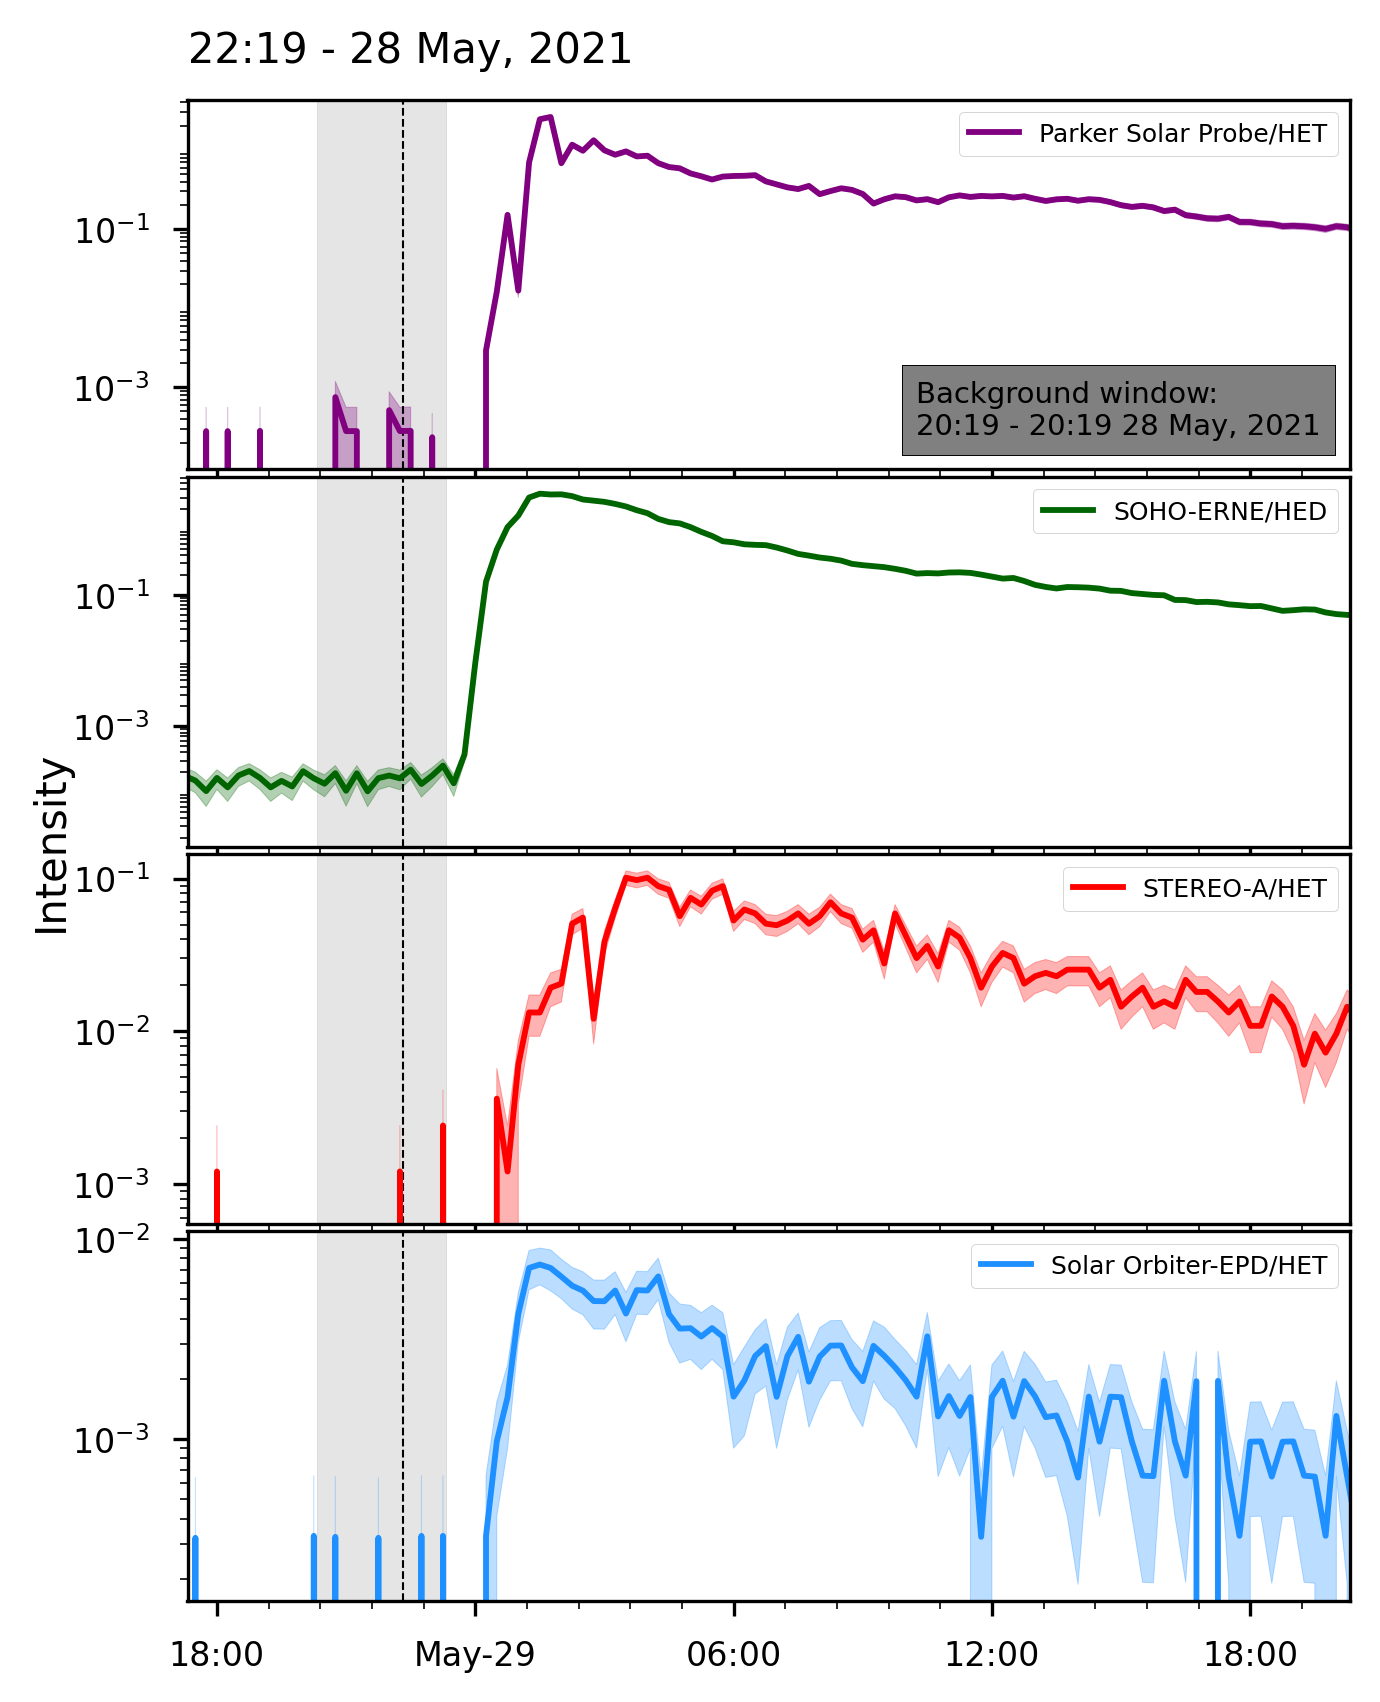

In [12]:
# User input on background
background_window = [startdate-dt.timedelta(hours=2), startdate+dt.timedelta(minutes=60)]

# User can check the window
may282021.plot_intensities(background_window=background_window)

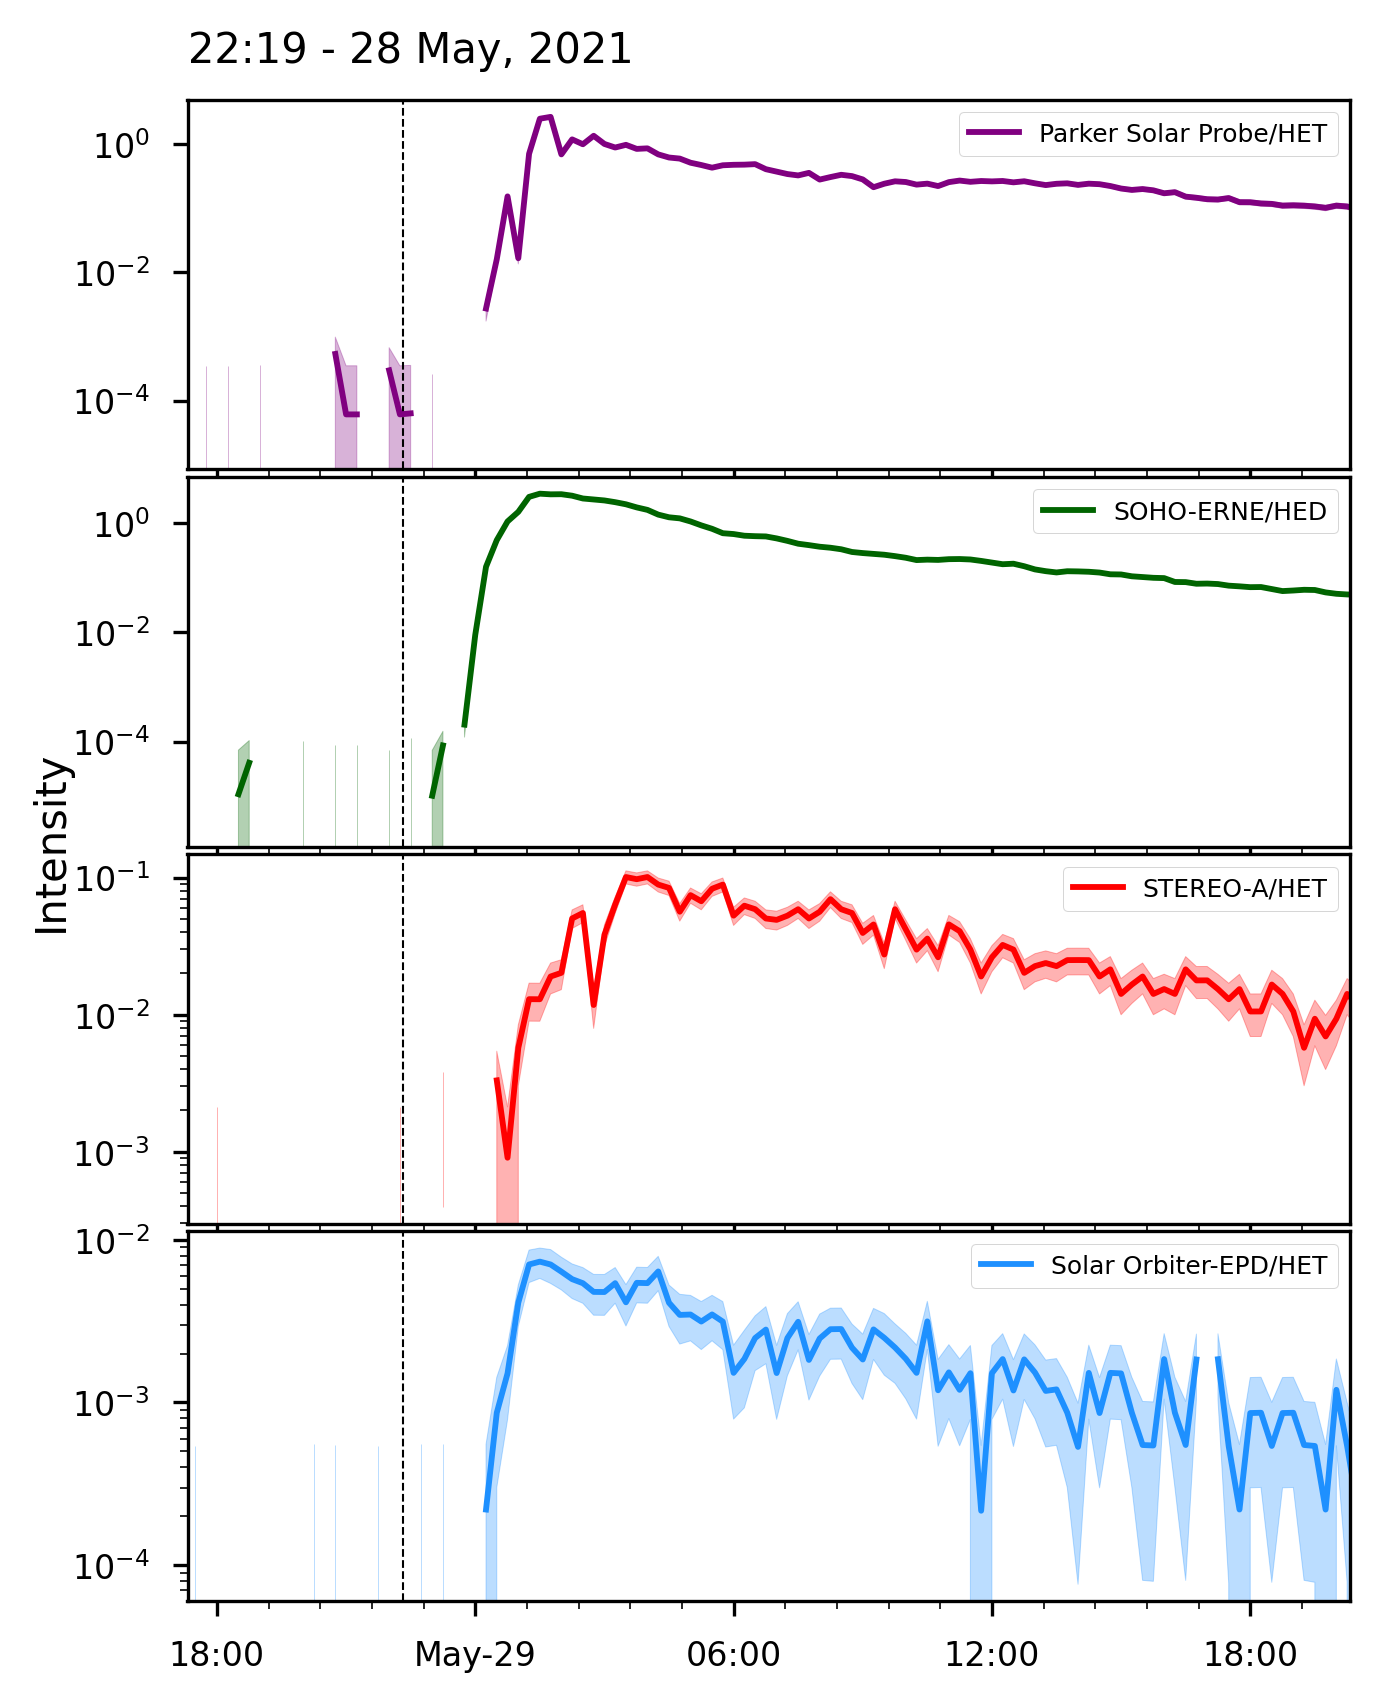

In [13]:
# Background subtraction
may282021.background_subtract(background_window)

may282021.plot_intensities()

## Instrument Intercalibration
[Return to top](#Table-of-Contents)

This method adjusts the intensity data so as to calibrate each instrument to one common baseline. In this work, STEREO-A HET is the baseline and the only instrument that we have found (for this energy range and species) that requires an intercalibration factor is SOHO-ERNE/HED (see [Richardson et al. 2014](https://link.springer.com/article/10.1007/s11207-014-0524-8) for more information).

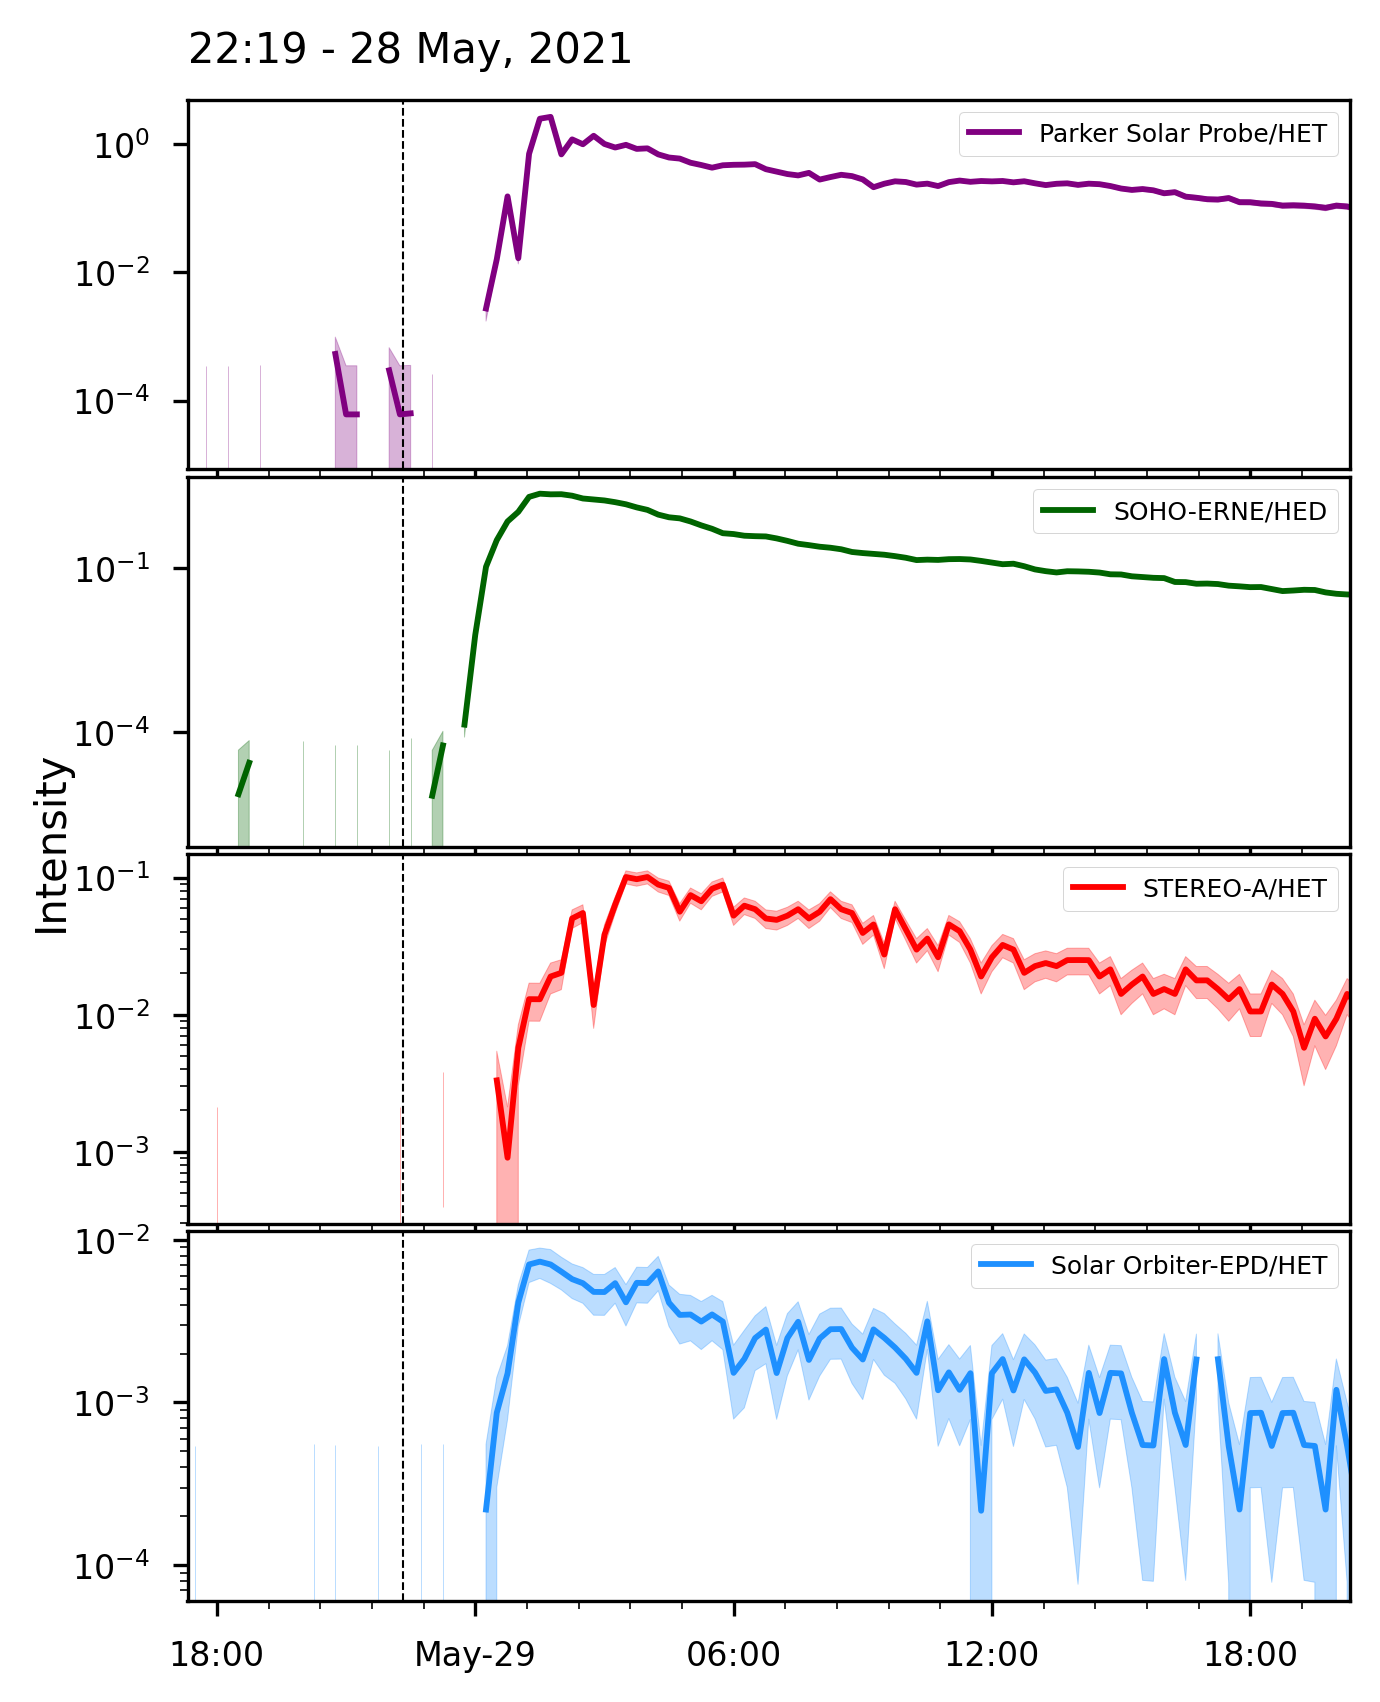

In [14]:
ic_values = {'PSP':1, 
             'SOHO':0.67, 
             'STEREO-A':1, 
             'Solar Orbiter':1}

may282021.intercalibrate(intercalibration_values=ic_values)
may282021.plot_intensities()

## Radial Scaling
[Return to top](#Table-of-Contents)

This method adjusts the intensity data to 1~au from whatever radial distance the spacecraft is measuring at according to: $I_{1 au} = I \cdot R^{a\pm b}$.

The values provided are in the form of `[a, b]` from [Lario et al. (2006)](https://iopscience.iop.org/article/10.1086/508982).

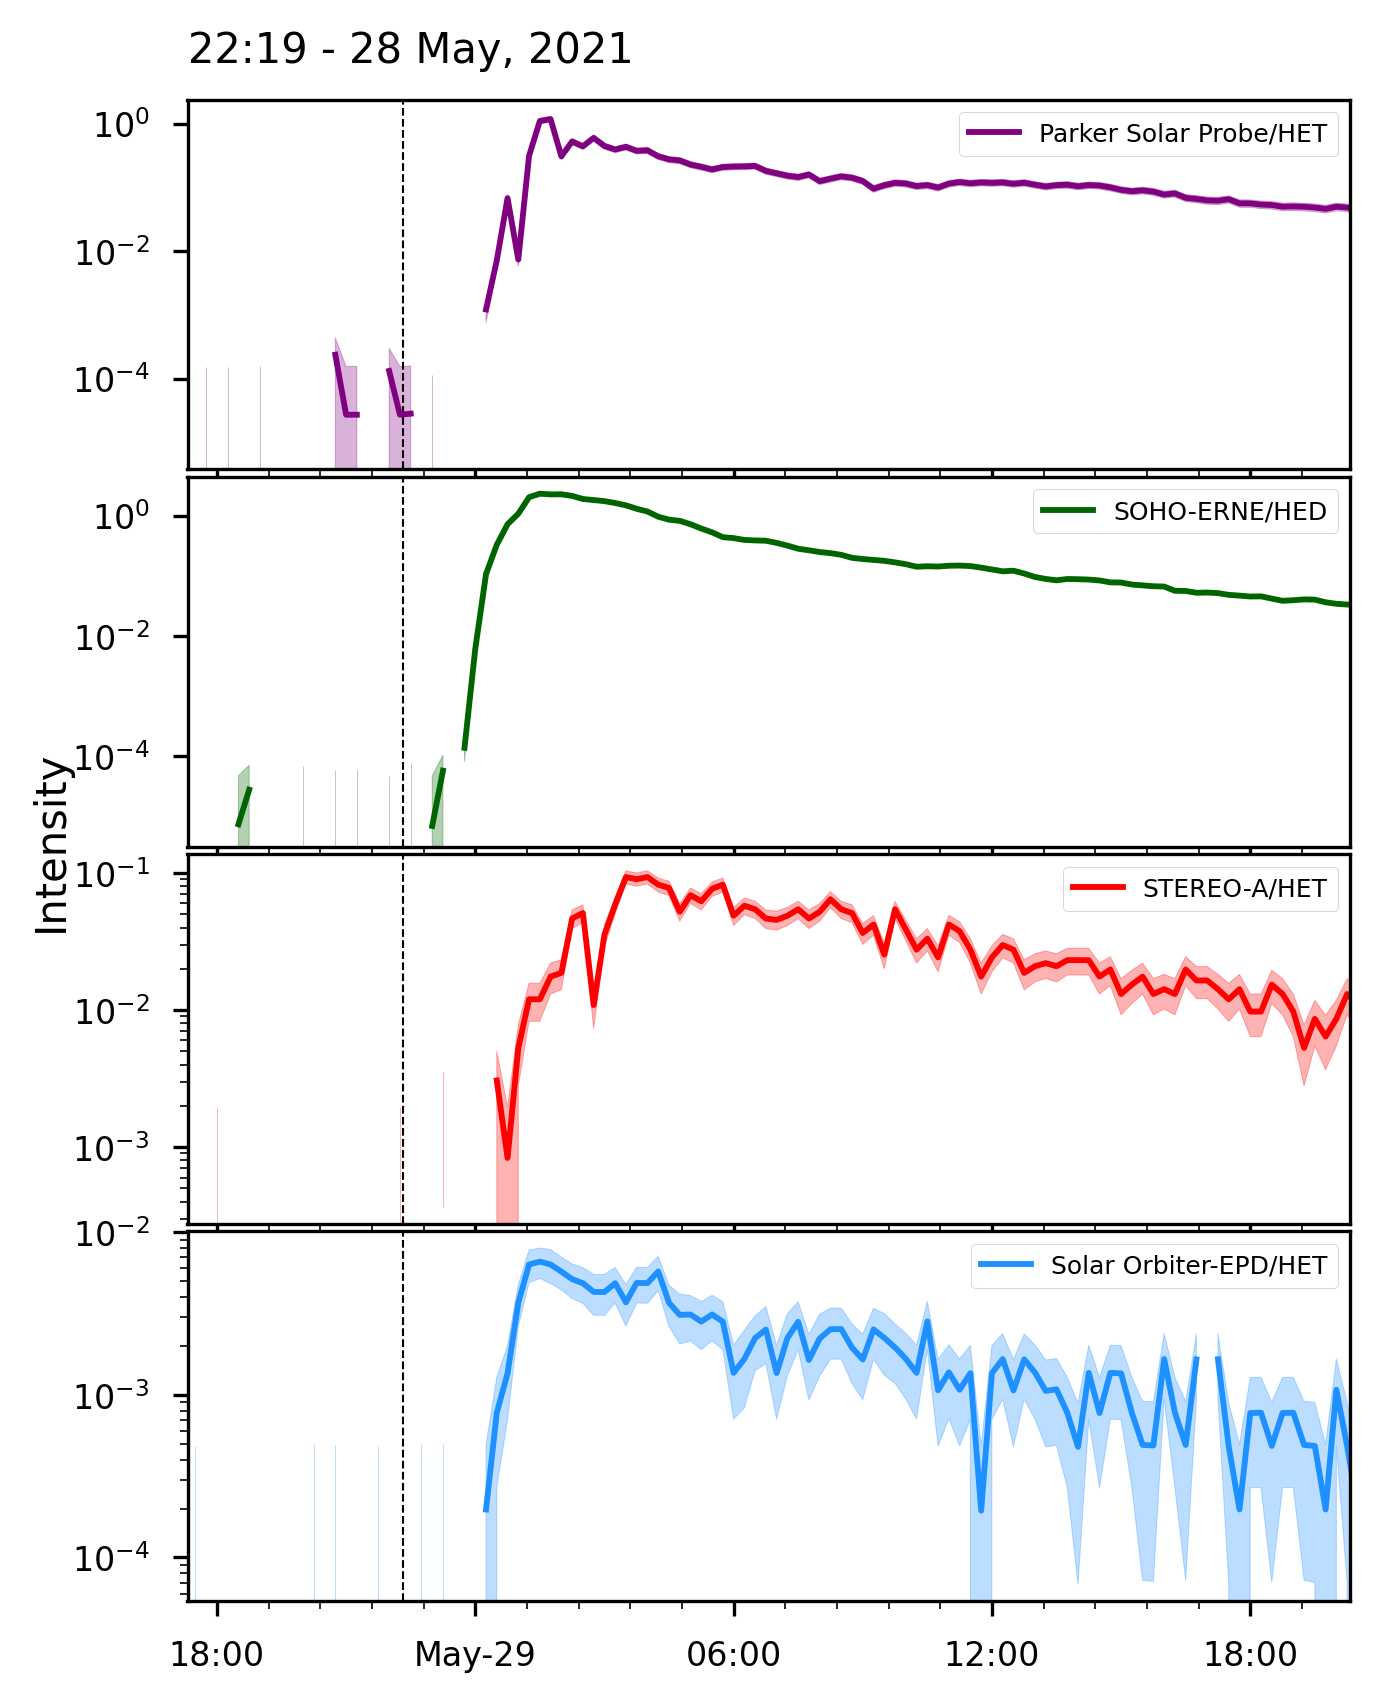

In [15]:
radscaling_values = [2.14, 0.26] 

may282021.radial_scale(radial_scaling_factors=radscaling_values)
may282021.plot_intensities()


## Peak Fits
[Return to top](#Table-of-Contents)

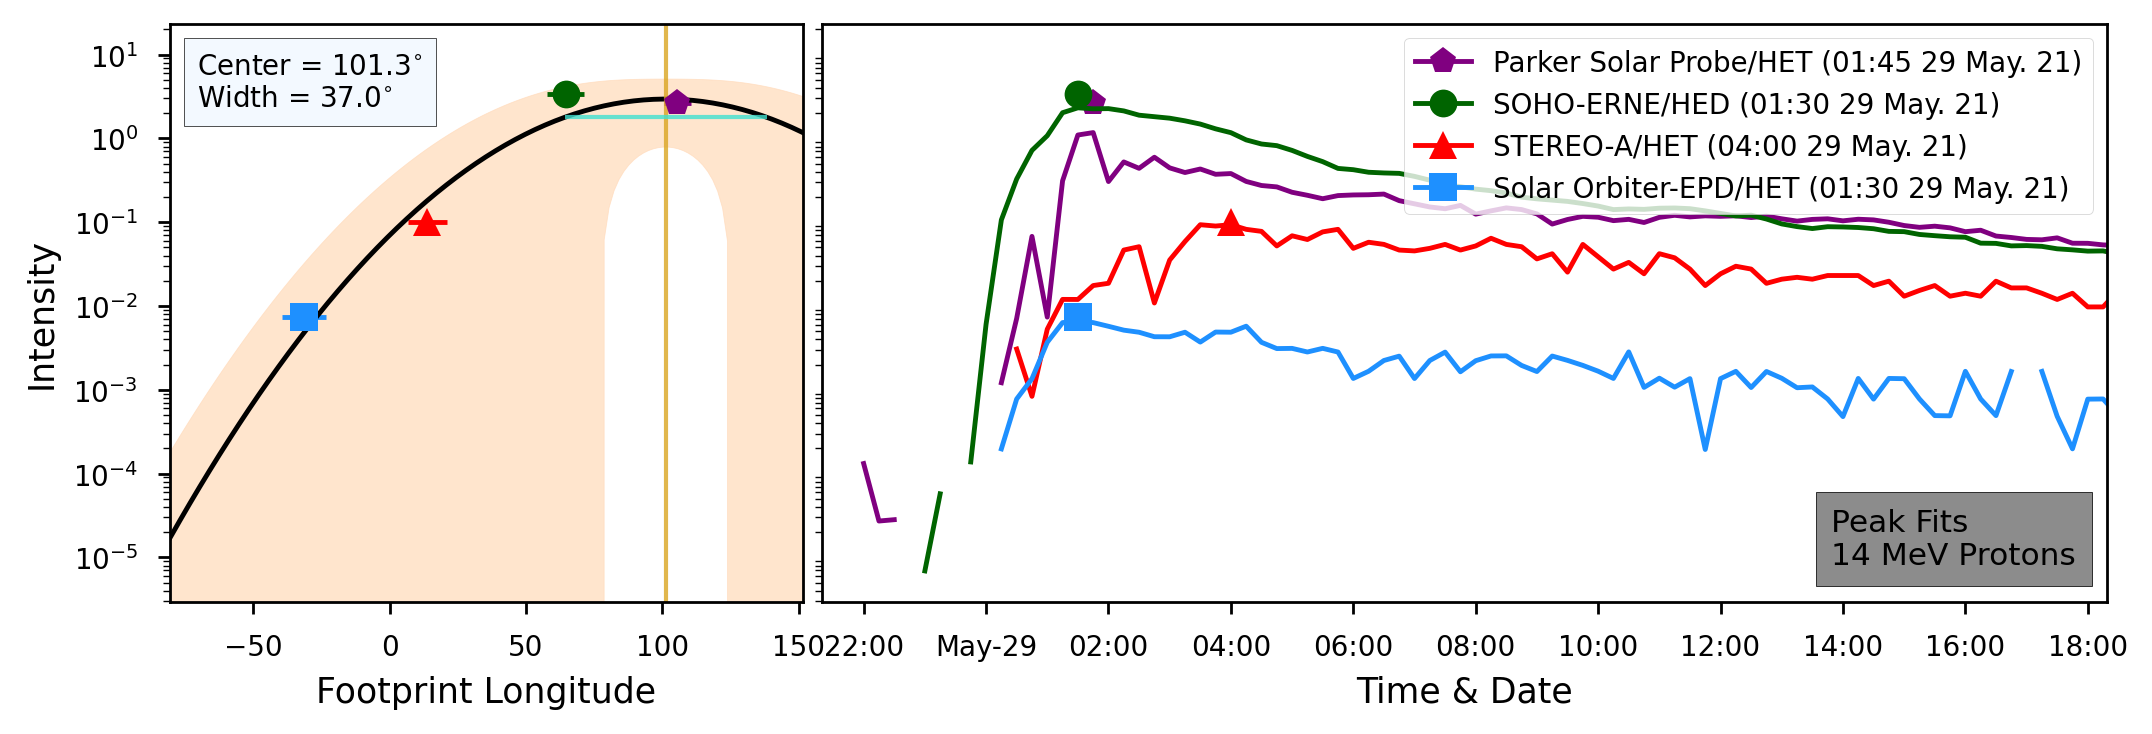

In [16]:
# JAX: TO DO
may282021.plot_peak_fits()

<div class="alert alert-block alert-danger">
<b>JAX:</b> Add a list of sc that aren't included in the calc but are still plotted in the end.
</div>

## Gaussian Fits
[Return to top](#Table-of-Contents)

First with scipy.curve_fit then with scipy's ODR function (with the uncertainties). Produce and save a fig into a new subfolder each time. Fig should include curve on the left and intensity with vertical line for time tracking on the right.

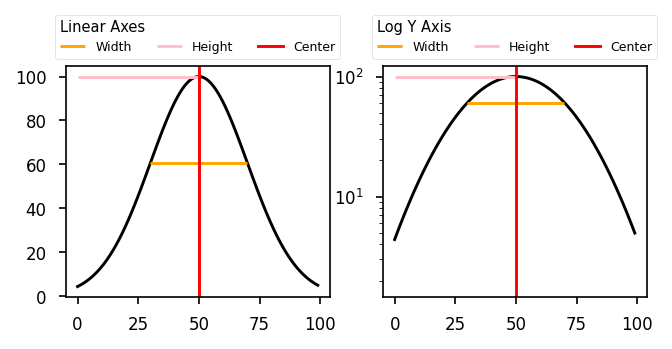

To calculate the Gaussian curve we use $f = A \cdot \exp\left[ \frac{-(x - X_0)^2}{2 \sigma^2} \right]$ where $A$ is the height of the curve, $X_0$ is the center of the curve, and $\sigma$ is the 'width' of the curve. In order to plot these values on the curve (i.e. straight lines at the center etc) the sigma value is plotted with `y = (0.6065) 10^{A}`, `xmin = X_0 - sigma`, and `xmax = X_0 + sigma`.

The logarithmic Gaussian curve is calculated with the same variables using $f = \log A - \frac{(x - X_0)^2}{2 \ln(10) \sigma^2}.$

The example in the figure uses the following parameters: $A=100, X_0=50,$ and $\sigma=20$.

No updated Gaussian parameters were found


/home/jaxl/Desktop/SOLER_SEPdistributiontool/JTL_SEP_functions.py:819: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(log_gauss_function, df['x'], df['y'],
/home/jaxl/Desktop/SOLER_SEPdistributiontool/JTL_SEP_functions.py:1222: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.clf()
/home/jaxl/Desktop/SOLER_SEPdistributiontool/JTL_SEP_functions.py:819: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(log_gauss_function, df['x'], df['y'],
/home/jaxl/Desktop/SOLER_SEPdistributiontool/JTL_SEP_functions.py:1222: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.clf()
/home/jaxl/Desktop/SOLER_SEPdistributiontool/JTL_SEP_functions.py:1222: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.clf()
/home/jaxl/Desktop/SOLER_SEPdistributiontool/JTL_SEP_functions.py:1222: UserWarning: Attem

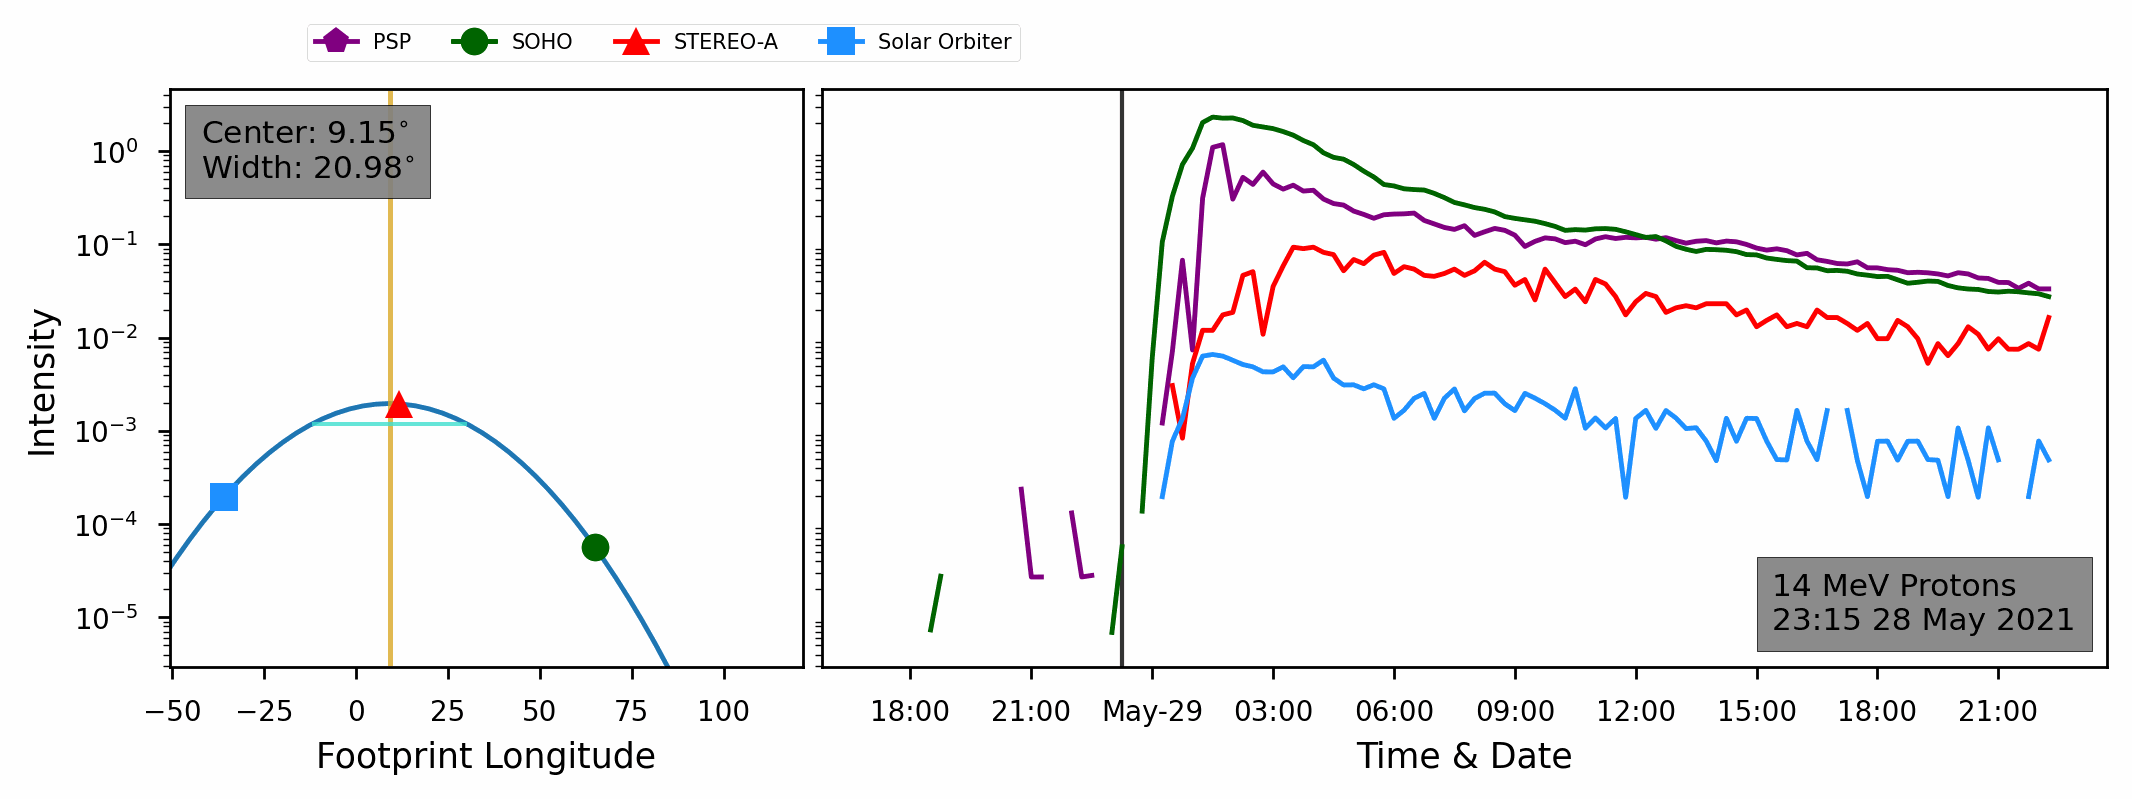

In [17]:
may282021.calc_Gaussian_fit()

In [18]:
# Test
may282021.get_sc_df('Gauss')

A  X0  sigma  A err  X0 err  sigma err  res
Time                                                             
2021-05-28 00:00:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-28 00:15:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-28 00:30:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-28 00:45:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-28 01:00:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
...                  ..  ..    ...    ...     ...        ...  ...
2021-05-29 22:45:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-29 23:00:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-29 23:15:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-29 23:30:00 NaN NaN    NaN    NaN     NaN        NaN  NaN
2021-05-29 23:45:00 NaN NaN    NaN    NaN     NaN        NaN  NaN

[192 rows x 7 columns]

## Final Results
[Return to top](#Table-of-Contents)

<div class="alert alert-block alert-danger">
<b>JAX:</b> Legend should have the energy ranges.
</div>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

<Figure size 2500x750 with 0 Axes>

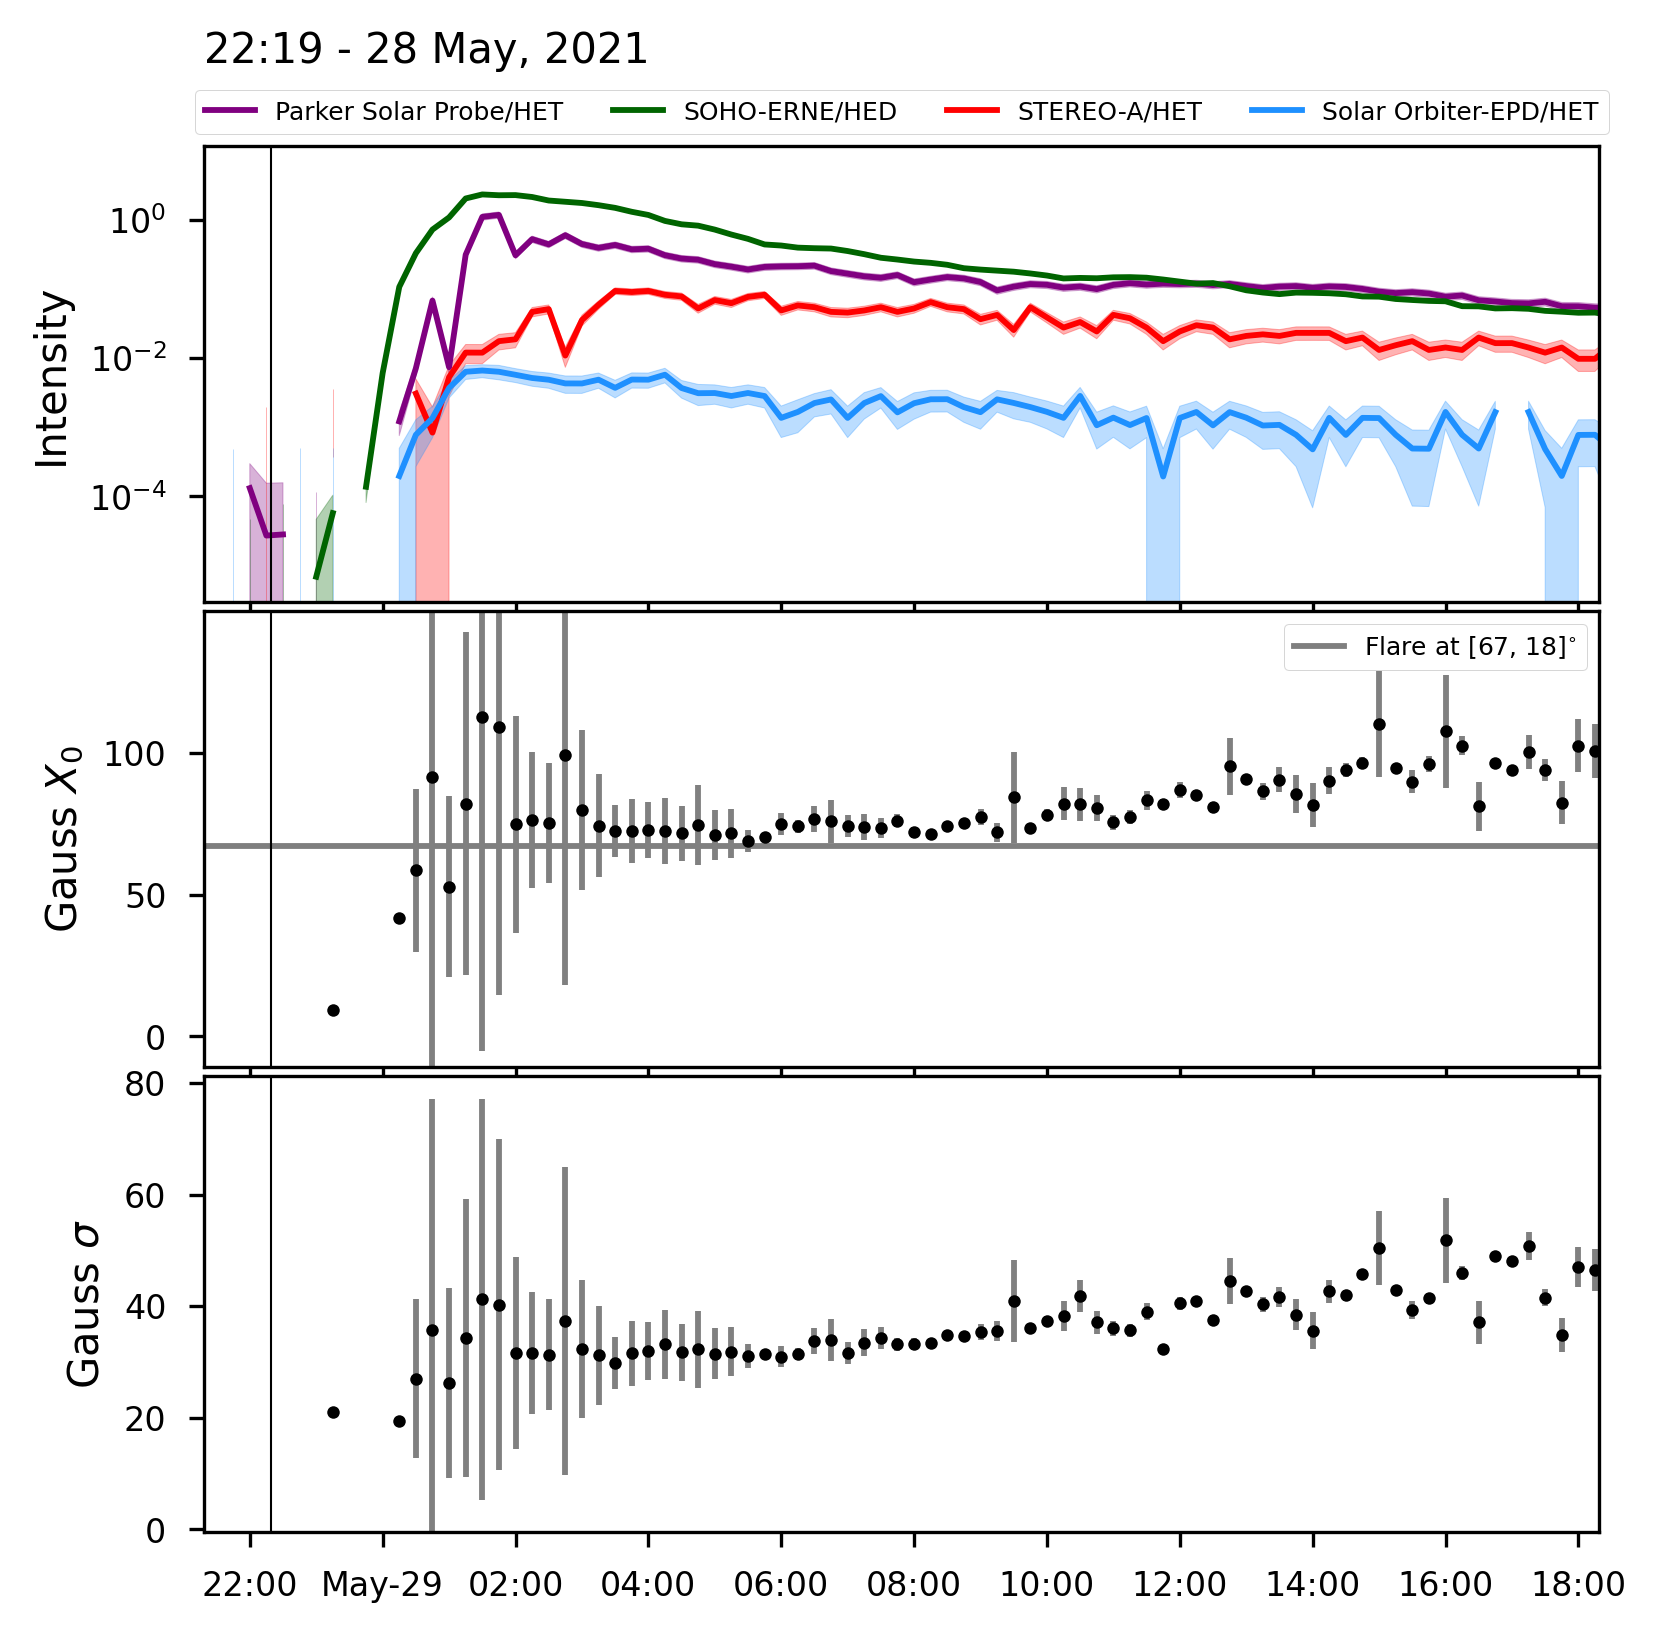

In [19]:
may282021.plot_gauss_results()

## Appendix
[Return to top](#Table-of-Contents)

### Load the data
In this method, we are downloading the spacecraft's positional data using SolarMACH and the intensity (and intensity uncertainty) data for the given proton energy channels (in this notebook the range is approximately 12-16 MeV).

If a range of channels is provided then they are merged using a weighted sum method, before averaging the data to 15-minute intervals (resampling).

### Background Subtraction

Calculates the average intensity value of the background time period and reduces the full dataset by this value.

### Intercalibration

This method adjusts the intensity data so as to calibrate each instrument to one common baseline. In this work, STEREO-A HET is the baseline and the only instrument that we have found (for this energy range and species) that requires an intercalibration factor is SOHO-ERNE/HED (see [Richardson et al. 2014](https://link.springer.com/article/10.1007/s11207-014-0524-8) for more information).

### Radial Scaling

Using the values presented in [Farwa, et al. (2025)](https://www.aanda.org/articles/aa/abs/2025/01/aa50945-24/aa50945-24.html), which used values for 4-13 MeV and 27-37 MeV protons from [Lario et al. (2006)](https://iopscience.iop.org/article/10.1086/508982) (for ~100 keV electrons, [Rodríguez-García et al. (2023)](https://www.aanda.org/10.1051/0004-6361/202244553) is used).

The scaled intensity is calculated as $I_{1 au} = I \cdot R^{a\pm b}$, where $R$ is the radial distance, $I$ is the original intensity, and (for protons specifically) the scaling factors are given as $a \pm b = 2.14 \pm 0.26$ (or for 27-37 MeV protons: $a \pm b = 1.97 \pm 0.27$).

To calculate the scaled uncertainty, we use the following procedure:
1. Calculate the boundary limits for the intensity calculation (e.g. $I_+ = I\cdot R^{a+b}$; $I_- = I\cdot R^{a-b}$; Therefore, $\Delta I_+ = |I_{1 au}-I_+|$ and $\Delta I_- = |I_{1 au}-I_-|$ are the limits.
2. Find the higher boundary limit, as long as it is < the nominal value ($I_{1 au}$).
3. Calculate the scaled uncertainty value: $\Delta I_{1 au} = \Delta I \cdot R^a$.
4. Combine both to get a final uncertainty value: $\Delta I_{1 au, final} = \sqrt{(max[\Delta I_-, \Delta I_+])^2 + (\Delta I_{1 au})^2}$.

NB: Check that this final uncertainty is still less than the intensity value!

## Glossary
[Return to top](#Table-of-Contents)

- `*.get_sc_df('sc')`
  Returns the data for the given spacecraft (`sc`) or if provided `'Gauss'` then it will return the results of fitting the Gaussian curve.
- `*.plot_intensities()`
  Plots the intensity time series of all the provided spacecraft. Can also pass the keyword argument: `background_window=[start, end]` with start and end dates to provide a highlighted region in the plot.